In [1]:
import pandas as pd
import numpy as np

# 20080101w_wave  的資料在21  /data/public/data/cwb_station

In [12]:
data=pd.read_csv('20080101w_wave.txt',sep='\s+',skiprows=7)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
data.head()

,*st,yyyymmddhhmi,H,T,Tmean,D,QC
0,46694A,200801010000,212,104.0,64,56,Q
1,46694A,200801010200,248,104.0,68,45,Q
2,46694A,200801010400,195,80.0,63,56,Q
3,46694A,200801010600,207,95.0,64,45,Q
4,46694A,200801010800,197,104.0,63,22,Q


# 資料可能會有缺值  用pd read 可能會出現問題

In [14]:
data.loc[737444:737446]

,*st,yyyymmddhhmi,H,T,Tmean,D,QC
737444,46759A,201801111700,Q,NaN,NaN,NaN,NaN
737445,46759A,201801111800,57,96.0,61,135,Q
737446,46759A,201801111900,46,82.0,55,101,Q


# 用 with open 方式一行一行處理

In [15]:
with open('20080101w_wave.txt','r') as f:
    w=f.readlines()

In [16]:
w[737452]

'46759A 201801111700                    Q\n'

## 去除前妻行的文字

In [17]:
station=[]
y=[]
m=[]
d=[]
h=[]
wave=[]
per=[]
for st,i in enumerate(w):
    if(st>7):
        station.append(i[0:6])
        y.append(i[7:11])
        m.append(i[11:13])
        d.append(i[13:15])
        h.append(i[15:17])
        wave.append(i[20:24])
        per.append(i[25:28])

In [19]:
data=pd.DataFrame({'station':station,'y':y,'m':m,'d':d,'h':h,'wave':wave,'per':per})

## 可以將空白的部分處理比較好

In [22]:
data.loc[737444:737446]

,station,y,m,d,h,wave,per
737444,46759A,2018,01,11,17,,
737445,46759A,2018,01,11,18,57,96
737446,46759A,2018,01,11,19,46,82


## 將資料屬性 從str 轉乘改屬的屬性

In [23]:
y2=[int(i) for i in y]
m2=[int(i) for i in m]
d2=[int(i) for i in d]
h2=[int(i) for i in h]
wave2=[np.nan if i.replace(' ','')=='' else float(i)   for i in wave ]
per2=[np.nan if i.replace(' ','')=='' else float(i)   for i in per ]



### 上述的 wave2 可能太簡短   以下是大家比較熟悉的寫法

In [27]:
wave2=[]
for i in range(len(wave)):
    if(wave[i].replace(' ','')==''):
        wave2.append(np.nan)
    else:
        wave2.append(float(wave[i]))
        

In [28]:
pd.DataFrame({'station':station,'y':y2,'m':m2,'d':d2,'h':h2,'wave':wave2,'per':per2}).head()

,station,y,m,d,h,wave,per
0,46694A,2008,1,1,0,212.0,104.0
1,46694A,2008,1,1,2,248.0,104.0
2,46694A,2008,1,1,4,195.0,80.0
3,46694A,2008,1,1,6,207.0,95.0
4,46694A,2008,1,1,8,197.0,104.0


In [30]:
from datetime import datetime,timedelta

### 將資料轉乘時間屬性

In [31]:
all_time=[datetime(y2[i],m2[i],d2[i],h2[i]) for i in range(len(y2))]

### 上述方式比較簡短  下面的方式比較能懂

In [34]:
all_time=[]
for i in range(len(y2)):
    all_time.append(datetime(y2[i],m2[i],d2[i],h2[i]))

In [35]:
data=pd.DataFrame({'station':station,'time':all_time,'wave':wave2,'per':per2})

In [36]:
data.head()

,station,time,wave,per
0,46694A,2008-01-01 00:00:00,212.0,104.0
1,46694A,2008-01-01 02:00:00,248.0,104.0
2,46694A,2008-01-01 04:00:00,195.0,80.0
3,46694A,2008-01-01 06:00:00,207.0,95.0
4,46694A,2008-01-01 08:00:00,197.0,104.0


### 取處  46694A  的測站資料 ，用copy方式 是有原因的  可以上網查一下(後面有補充)

In [72]:
stationA=data[data['station']=='46694A'].copy()

In [73]:
stationA.head()

,station,time,wave,per
0,46694A,2008-01-01 00:00:00,212.0,104.0
1,46694A,2008-01-01 02:00:00,248.0,104.0
2,46694A,2008-01-01 04:00:00,195.0,80.0
3,46694A,2008-01-01 06:00:00,207.0,95.0
4,46694A,2008-01-01 08:00:00,197.0,104.0


In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

(735507.0, 735539.0)

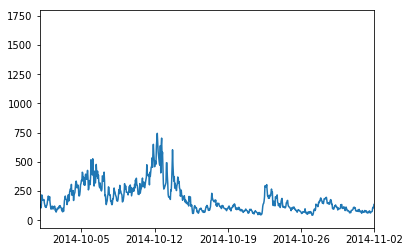

In [75]:
plt.plot(stationA['time'],stationA['wave'])
plt.xlim([datetime(2014,10,1,0),datetime(2014,11,2,0)])

## 補值比對方式  比較難懂的可能是while 那段  請自行帶入數值

In [80]:
newstat=[]
newtime=[]
newwave=[]
newperd=[]
startime=datetime(2008,1,1,0,0)

for i in range(len(stationA)):
    while(startime<stationA['time'][i]):
        newwave.append(np.nan)
        newtime.append(startime)
        startime=startime+timedelta(hours=1)
        
        
        
        
    newwave.append(stationA['wave'][i])
    newtime.append(startime)
    startime=startime+timedelta(hours=1)
                                         





In [81]:
data2=pd.DataFrame({'time':newtime,'wave':newwave})

In [82]:
data2.head()

,time,wave
0,2008-01-01 00:00:00,212.0
1,2008-01-01 01:00:00,NaN
2,2008-01-01 02:00:00,248.0
3,2008-01-01 03:00:00,NaN
4,2008-01-01 04:00:00,195.0


(735507.0, 735539.0)

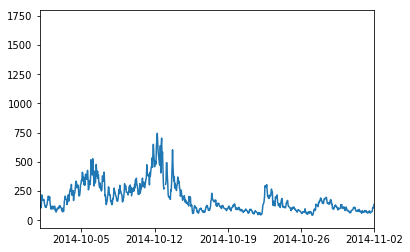

In [83]:
plt.plot(data2['time'],data2['wave'])
plt.xlim([datetime(2014,10,1,0),datetime(2014,11,2,0)])

## 取出想要的時間軸

In [84]:
data2018=data2[(data2['time']>=datetime(2018,1,1,0)) & (data2['time']<datetime(2019,1,1,0))]

In [86]:
data2018.head()

,time,wave
87672,2018-01-01 00:00:00,220.0
87673,2018-01-01 01:00:00,239.0
87674,2018-01-01 02:00:00,251.0
87675,2018-01-01 03:00:00,206.0
87676,2018-01-01 04:00:00,166.0


# 補充教材   copy的重要性

In [94]:
B=[1,2,3,5]
A=B
A[0]=3

In [95]:
A

[3, 2, 3, 5]

In [96]:
B

[3, 2, 3, 5]

In [97]:
B=[1,2,3,5]
A=B.copy()
A[0]=3

In [98]:
A

[3, 2, 3, 5]

In [99]:
B

[1, 2, 3, 5]